In [1]:
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
import torch.nn as nn
from torchvision.models import resnet18
import torch.optim as optim
from torch_funcs import fit, test, get_cifar10_loaders

In [2]:
# config
batch_size = 64
test_batch_size = 128
epochs = 3
lr = 1e-3
loss_func = F.cross_entropy

use_cuda = torch.cuda.is_available()
device = torch.device("cuda"
                      if use_cuda
											else "cpu"
										)
print(f'CUDA enabled: {use_cuda}')

CUDA enabled: True


In [6]:
model = resnet18()
model.fc = nn.Linear(in_features=512, out_features=10)
model = model.to(device)

train_dl, test_dl = get_cifar10_loaders(batch_size, test_batch_size)
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)

Files already downloaded and verified
Files already downloaded and verified


In [7]:
train_history = []
acc_history = []

for epoch in range(1, epochs + 1):
	train_history.extend( fit(model, device, train_dl, loss_func, epoch, optimizer=optimizer, silent=False) )
	acc_history.append( test(model, device, test_dl, loss_func, silent=True) )

Train Epoch: 1 -> batch: 0 [0/50000 (0%)]	Loss: 0.025314
Train Epoch: 1 -> batch: 100 [6400/50000 (13%)]	Loss: 2.037164
Train Epoch: 1 -> batch: 200 [12800/50000 (26%)]	Loss: 1.714025
Train Epoch: 1 -> batch: 300 [19200/50000 (38%)]	Loss: 1.617364
Train Epoch: 1 -> batch: 400 [25600/50000 (51%)]	Loss: 1.534277
Train Epoch: 1 -> batch: 500 [32000/50000 (64%)]	Loss: 1.503883
Train Epoch: 1 -> batch: 600 [38400/50000 (77%)]	Loss: 1.457350
Train Epoch: 1 -> batch: 700 [44800/50000 (90%)]	Loss: 1.403684
Train Epoch: 2 -> batch: 0 [0/50000 (0%)]	Loss: 0.011607
Train Epoch: 2 -> batch: 100 [6400/50000 (13%)]	Loss: 1.281443
Train Epoch: 2 -> batch: 200 [12800/50000 (26%)]	Loss: 1.218102
Train Epoch: 2 -> batch: 300 [19200/50000 (38%)]	Loss: 1.262830
Train Epoch: 2 -> batch: 400 [25600/50000 (51%)]	Loss: 1.215959
Train Epoch: 2 -> batch: 500 [32000/50000 (64%)]	Loss: 1.222611
Train Epoch: 2 -> batch: 600 [38400/50000 (77%)]	Loss: 1.212840
Train Epoch: 2 -> batch: 700 [44800/50000 (90%)]	Loss: 1

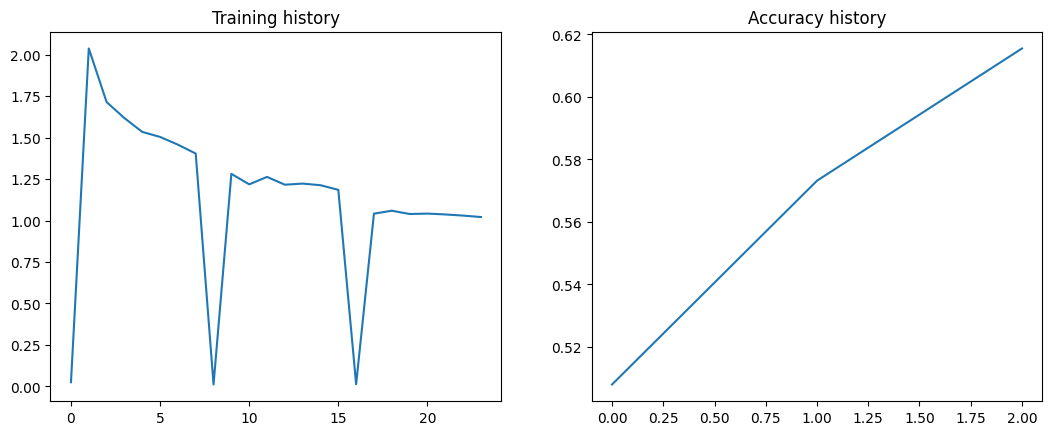

In [8]:
fig, (ax_train, ax_test) = plt.subplots(1, 2)
fig.set_size_inches(12.8, 4.8)

ax_train.plot(train_history)
ax_test.plot(acc_history)
ax_train.set_title('Training history')
ax_test.set_title('Accuracy history')

plt.show(fig)